## Importando as bibliotecas necessárias

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Importando os datasets

In [95]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

train.head()

C:\Users\pedro\AppData\Local\Temp\ipykernel_8860\2599790872.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/raw/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.38,22 Years and 4 Months,No,49.57,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,Good,809.98,24.80,22 Years and 5 Months,No,49.57,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [96]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,...,2022.00,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,...,4.00,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,...,4.00,Good,809.98,33.81,NaN,No,49.57,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.00,Good,809.98,32.43,23 Years and 0 Months,No,49.57,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.99,2,...,5.00,Good,605.03,25.93,27 Years and 3 Months,No,18.82,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


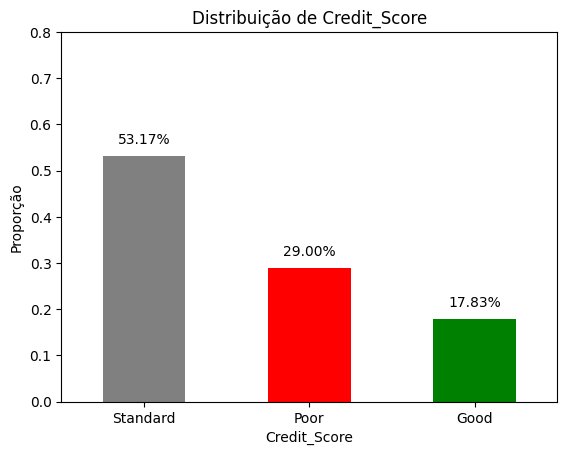

In [97]:
# Visualização da distribuição da variável alvo 'Credit_Score'
proporcoes = train["Credit_Score"].value_counts(normalize=True)

# Plota o gráfico
proporcoes.plot(kind='bar', color=['gray', 'red', 'green'])

plt.title("Distribuição de Credit_Score")
plt.xticks(rotation=0)
plt.ylabel("Proporção")

# Adiciona os rótulos nas barras
for i, valor in enumerate(proporcoes):
    plt.text(i, valor + 0.02, f"{valor:.2%}", ha='center', va='bottom', fontsize=10)

plt.ylim(0, 0.8)  # Garante espaço para os rótulos acima das barras

plt.show()

In [98]:
train.head().T

,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.84,NaN,NaN,NaN,1824.84
Num_Bank_Accounts,3,3,3,3,3


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [100]:
# Análise das variáveis NÃO numéricas
train.describe(exclude='number').T

,count,unique,top,freq
ID,100000,100000,0x25fd5,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Stevex,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,17273.83,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [101]:
df = train.copy()

**ID**, **Customer_ID**, **Name**, **SSN**: Não são relavantes para aplicação dos modelos

**Type_of_Loan**:
Contêm valores nulos e é uma coluna que contêm os tipos de empréstimos que o cliente fez, no entanto, não temos como saber se a ordem está correta. Sendo assim, essa coluna não traz muita informação para o modelo. Quanto aos empréstimos, a coluna Num_of_Loan é mais relavante, já que ela traz a quantidade de empréstimos feitos.

In [102]:
# Remover colunas irrelevantes ou que não ajudam na predição
df = df.drop(columns=['ID','Customer_ID','Name','SSN', 'Type_of_Loan'])

Levando em consideração as análises acima e as informações no Kaggle temos:

**Age**, **Annual_Income**, **Num_of_Loan**, **Num_of_Delayed_Payment**, **Outstanding_Debt**, **Amount_invested_monthly**, **Changed_Credit_Limit** e **Monthly_Balance**
Tipo: object.
É possivel notar que os valores são inteiros ou float, mas essas colunas foram classificadas como object devido a possivel presença de algum caracter especial junto aos números ou em algumas células. Retirar caracteres e alterar para int/float

**Occupation** e **Credit_Mix**:
Tipo: object.
É possível ver que existe uma frequencia nos registros igual a underline, portanto ajustar. Manter object

In [103]:
colunas = ["Age", "Num_of_Loan", "Num_of_Delayed_Payment", "Annual_Income",
           "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly", "Monthly_Balance"]

# Limpa apenas colunas do tipo texto listadas em colunas
for col in colunas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('_', '', regex=False)  # remove underline

# Tenta converter colunas do tipo objeto para tipo numérico
for col in colunas:
    if df[col].dtype == 'object' or df[col].dtype.name == 'string':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            pass

# Limpa colunas Occupation e Credit_Mix: substitui underline por ''
for col in ['Occupation', 'Credit_Mix']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('_', '', regex=False)  # remove underline

# Substitui os espaços em branco por NaN
df.replace('', pd.NA, inplace=True)

# Resultado final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

In [104]:
# Contagem de valores nulos por coluna
missing = df.isnull().sum()
missing_percent = (missing / df.shape[0]) * 100

missing_df = pd.DataFrame({
    "Total de Nulos": missing,
    "% de Nulos": missing_percent
})

# Exibir colunas com nulos ordenadas pelo percentual
missing_df[missing_df["Total de Nulos"] > 0].sort_values(by="% de Nulos", ascending=False)

,Total de Nulos,% de Nulos
Credit_Mix,20195,20.20
Monthly_Inhand_Salary,15002,15.00
Credit_History_Age,9030,9.03
Occupation,7062,7.06
Num_of_Delayed_Payment,7002,7.00
Amount_invested_monthly,4479,4.48
Changed_Credit_Limit,2091,2.09
Num_Credit_Inquiries,1965,1.97
Monthly_Balance,1200,1.20


In [105]:
# Análise das variáveis numéricas
pd.set_option('display.float_format','{:.2f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.00,110.65,686.24,-500.00,24.00,33.00,42.00,8698.00
Annual_Income,100000.00,176415.70,1429618.05,7005.93,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,84998.00,4194.17,3183.69,303.65,1625.57,3093.75,5957.45,15204.63
Num_Bank_Accounts,100000.00,17.09,117.40,-1.00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.00,22.47,129.06,0.00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.00,72.47,466.42,1.00,8.00,13.00,20.00,5797.00
Num_of_Loan,100000.00,3.01,62.65,-100.00,1.00,3.00,5.00,1496.00
Delay_from_due_date,100000.00,21.07,14.86,-5.00,10.00,18.00,28.00,67.00
Num_of_Delayed_Payment,92998.00,30.92,226.03,-3.00,9.00,14.00,18.00,4397.00
Changed_Credit_Limit,97909.00,10.39,6.79,-6.49,5.32,9.40,14.87,36.97


In [106]:
# Análise das variáveis NÃO numéricas
df.describe(exclude='number').T

,count,unique,top,freq
Month,100000,8,January,12500
Occupation,92938,15,Lawyer,6575
Credit_Mix,79805,3,Standard,36479
Credit_History_Age,90970,404,15 Years and 11 Months,446
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,7,Low_spent_Small_value_payments,25513
Credit_Score,100000,3,Standard,53174


**Month**:
Podemos passar esses registros para números inteiros que representam os meses do ano.
Não contêm nulos

**Occupation**:
Contêm nulos.

**Credit_Mix**:
Contêm nulos.

**Credit_History_Age**:
Podemos passar esses registros para números inteiros em quantidade de meses. Contêm valores nulos.

**Payment_of_Min_Amount**: ok

**Payment_Behaviour**: ok

**Credit_Score**: Coluna target. Representa a faixa de pontuação de crédito (Ruim, Padrão, Bom). Podemos passar esses registros para números inteiros.


In [107]:
# Tratamento da coluna 'Credit_History_Age'

def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan  # se for NaN, mantém como NaN

    if not pd.isna(age_str):  # se for diferente de NaN, aplica o split e conversão
        parts = str(age_str).split()
        years = int(parts[0])
        months = int(parts[3])
        return years * 12 + months

# Aplicar no dataframe
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

In [108]:
# Tratamento da coluna 'Month'

meses = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}

df['Month'] = df['Month'].str.lower().map(meses)

In [109]:
# Tratamento da coluna 'Credit_Score'

df['Credit_Score'] = df['Credit_Score'].map({
    "Poor": 0,
    "Standard": 1,
    "Good": 2,
    np.nan: 3
}).astype(int)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   ob

In [111]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,1824.84,3,4,3,4,3,...,<NA>,809.98,26.82,265.00,No,49.57,80.42,High_spent_Small_value_payments,312.49,2
1,2,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,Good,809.98,31.94,NaN,No,49.57,118.28,Low_spent_Large_value_payments,284.63,2
2,3,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,Good,809.98,28.61,267.00,No,49.57,81.70,Low_spent_Medium_value_payments,331.21,2
3,4,23,Scientist,19114.12,NaN,3,4,3,4,5,...,Good,809.98,31.38,268.00,No,49.57,199.46,Low_spent_Small_value_payments,223.45,2
4,5,23,Scientist,19114.12,1824.84,3,4,3,4,6,...,Good,809.98,24.80,269.00,No,49.57,41.42,High_spent_Medium_value_payments,341.49,2


In [112]:
# Seleciona variáveis numéricas
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Seleciona variáveis categóricas (object ou category)
variaveis_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [113]:
# Remove 'Credit_Score' da lista se ela estiver presente
if 'Credit_Score' in variaveis_numericas:
    variaveis_numericas.remove('Credit_Score')

print(f"Variáveis numéricas identificadas: {variaveis_numericas}")
print(f"Variáveis categóricas identificadas: {variaveis_categoricas}")

Variáveis numéricas identificadas: ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
Variáveis categóricas identificadas: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [114]:
# Cria um DataFrame para armazenar os resultados
outlier_stats = pd.DataFrame(columns=['Variável', 'Qtd_Outliers', 'Percentual_Outliers'])

# Loop pelas variáveis numéricas
for var in variaveis_numericas:
    serie = df[var].dropna()
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identifica outliers
    outliers = serie[(serie < limite_inferior) | (serie > limite_superior)]
    qtd_outliers = outliers.count()
    percentual = 100 * qtd_outliers / len(serie)

    outlier_stats = pd.concat([outlier_stats, pd.DataFrame({
        'Variável': [var],
        'Qtd_Outliers': [qtd_outliers],
        'Percentual_Outliers': [percentual]
    })], ignore_index=True)

# Exibe os resultados ordenados pelo percentual
outlier_stats.sort_values(by='Percentual_Outliers', ascending=False, inplace=True)
print(outlier_stats)

                    Variável Qtd_Outliers  Percentual_Outliers
16   Amount_invested_monthly        10096                10.57
17           Monthly_Balance         7636                 7.73
15       Total_EMI_per_month         6795                 6.79
12          Outstanding_Debt         5272                 5.27
7                Num_of_Loan         4348                 4.35
8        Delay_from_due_date         4002                 4.00
2              Annual_Income         2783                 2.78
1                        Age         2781                 2.78
5            Num_Credit_Card         2271                 2.27
6              Interest_Rate         2034                 2.03
3      Monthly_Inhand_Salary         1683                 1.98
11      Num_Credit_Inquiries         1650                 1.68
4          Num_Bank_Accounts         1315                 1.31
9     Num_of_Delayed_Payment          736                 0.79
10      Changed_Credit_Limit          668              

C:\Users\pedro\AppData\Local\Temp\ipykernel_8860\873075722.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_stats = pd.concat([outlier_stats, pd.DataFrame({


In [115]:
# Função para tratar outliers usando IQR

def tratar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[coluna] = np.where(df[coluna] < limite_inferior, limite_inferior, df[coluna])
    df[coluna] = np.where(df[coluna] > limite_superior, limite_superior, df[coluna])
    return df

# Aplicar tratamento de outliers nas variáveis numéricas
for coluna in variaveis_numericas:
    df = tratar_outliers_iqr(df, coluna)

In [116]:
# IMPUTAÇÃO DE DADOS COM MEDIANA E "DESCONHECIDO"

# Imputação de dados
for col in variaveis_numericas:
    df[col] = df[col].fillna(df[col].median())

for col in variaveis_categoricas:
    df[col] = df[col].fillna('Desconhecido')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  float64
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

In [118]:
# Label Encoding em todas as variaveis categóricas
cat_features = df.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))

In [119]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1.00,23.00,13,19114.12,1824.84,3.00,4.00,3.00,4.00,3.00,...,1,809.98,26.82,265.00,1,49.57,80.42,3,312.49,2
1,2.00,23.00,13,19114.12,3093.75,3.00,4.00,3.00,4.00,-1.00,...,2,809.98,31.94,219.00,1,49.57,118.28,4,284.63,2
2,3.00,-3.00,13,19114.12,3093.75,3.00,4.00,3.00,4.00,3.00,...,2,809.98,28.61,267.00,1,49.57,81.70,5,331.21,2
3,4.00,23.00,13,19114.12,3093.75,3.00,4.00,3.00,4.00,5.00,...,2,809.98,31.38,268.00,1,49.57,199.46,6,223.45,2
4,5.00,23.00,13,19114.12,1824.84,3.00,4.00,3.00,4.00,6.00,...,2,809.98,24.80,269.00,1,49.57,41.42,2,341.49,2


In [120]:
df.to_csv("../data/processed/train-processed.csv", index=False)